<a href="https://colab.research.google.com/github/Ishita95-harvad/Google-AI-Assistants-for-Data-Tasks-with-Gemma/blob/main/Google_%E2%80%93_AI_Assistants_for_Data_Tasks_with_Gemma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google – AI Assistants for Data Tasks with Gemma**

Build tools to assist Kaggle developers

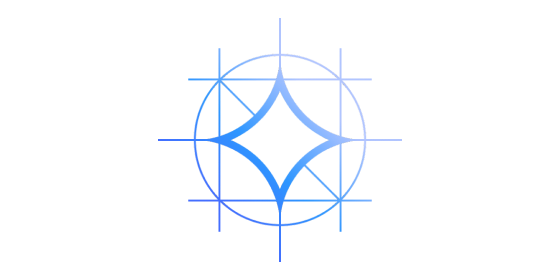



---



## Data loading

### Subtask:
Load the data from the provided text files into pandas DataFrames.


**Reasoning**:
Load the two text files into pandas DataFrames and display the first 5 rows of each.



In [1]:
import pandas as pd

try:
    df_categories = pd.read_csv('submission_categories.txt', sep='\t', header=None)
    df_instructions = pd.read_csv('submission_instructions.txt', sep='\t', header=None)

    display(df_categories.head())
    display(df_instructions.head())
except FileNotFoundError:
    print("Error: One or both of the input files were not found.")
    df_categories = None
    df_instructions = None
except pd.errors.ParserError:
    print("Error: Could not parse the files. Check the separator and header.")
    df_categories = None
    df_instructions = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_categories = None
    df_instructions = None

,0
0,# Competition Overview
1,**The goal of this competition is to create no...
2,- Answer common questions about the Kaggle pla...
3,- Explain or teach basic data science concepts.
4,- Summarize Kaggle Solution write ups.


,0
0,# Submission Instructions
1,"**To participate in this competition, you must..."
2,**To submit to this competition fill out the G...


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Data exploration

### Subtask:
Explore the loaded dataframes `df_categories` and `df_instructions` to understand their structure and content.


**Reasoning**:
Examine the shape, missing values, data types, and a sample of the data in both dataframes to understand their structure and content, then summarize the unique values and describe potential text analysis.



In [2]:
# Examine the shape of each DataFrame
print("Shape of df_categories:", df_categories.shape)
print("Shape of df_instructions:", df_instructions.shape)

# Check for missing values
print("\nMissing values in df_categories:\n", df_categories.isnull().sum())
print("\nMissing values in df_instructions:\n", df_instructions.isnull().sum())

# Inspect data types
print("\nData types in df_categories:\n", df_categories.dtypes)
print("\nData types in df_instructions:\n", df_instructions.dtypes)

# View a sample of the data
print("\nFirst few rows of df_categories:\n", df_categories.head())
print("\nLast few rows of df_categories:\n", df_categories.tail())
print("\nFirst few rows of df_instructions:\n", df_instructions.head())
print("\nLast few rows of df_instructions:\n", df_instructions.tail())

# Summarize the unique values (if applicable) -  Since there is only one column, unique values are the rows.
print("\nUnique values and counts in df_categories (first 10):\n", df_categories[0].value_counts().head(10))
print("\nUnique values and counts in df_instructions (first 10):\n", df_instructions[0].value_counts().head(10))


# Analyze the text content (if applicable) - Describe potential analysis
print("\nPotential Text Analysis:")
print("Further analysis could involve tokenization, stop word removal, stemming/lemmatization to prepare the text data for analysis.")
print("We could then calculate word frequencies, identify key phrases, and explore sentiment or topic modeling.")
print("For df_categories, this would help understand the competition's goals and themes.")
print("For df_instructions, this could reveal key submission requirements and constraints.")

Shape of df_categories: (9, 1)
Shape of df_instructions: (3, 1)

Missing values in df_categories:
 0    0
dtype: int64

Missing values in df_instructions:
 0    0
dtype: int64

Data types in df_categories:
 0    object
dtype: object

Data types in df_instructions:
 0    object
dtype: object

First few rows of df_categories:
                                                    0
0                             # Competition Overview
1  **The goal of this competition is to create no...
2  - Answer common questions about the Kaggle pla...
3    - Explain or teach basic data science concepts.
4             - Summarize Kaggle Solution write ups.

Last few rows of df_categories:
                                                    0
4             - Summarize Kaggle Solution write ups.
5  - Explain or teach concepts from Kaggle Soluti...
6  - Answer common questions about the Python pro...
7  Submissions to this competition take the form ...
8  **How can Gemma be used to assist Kaggle devel...

Fi

## Data wrangling

### Subtask:
Clean and potentially transform the data in `df_categories` and `df_instructions`.


**Reasoning**:
Clean the data in `df_categories` and `df_instructions` by removing special characters, extra whitespace, and converting text to lowercase.  Since there are no missing values, imputation is not needed. No new features are created.



In [3]:
import re

def clean_text(text):
    """Cleans a given text string."""
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading/trailing whitespace
    return text

# Apply the cleaning function to both dataframes
df_categories[0] = df_categories[0].apply(clean_text)
df_instructions[0] = df_instructions[0].apply(clean_text)

display(df_categories.head())
display(df_instructions.head())

,0
0,competition overview
1,the goal of this competition is to create note...
2,answer common questions about the kaggle platform
3,explain or teach basic data science concepts
4,summarize kaggle solution write ups


,0
0,submission instructions
1,to participate in this competition you must cr...
2,to submit to this competition fill out the goo...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby(0).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Data analysis

### Subtask:
Analyze the cleaned data in `df_categories` and `df_instructions` to identify relationships between categories and instructions.


**Reasoning**:
Analyze the cleaned data in `df_categories` and `df_instructions` to identify relationships between categories and instructions using keyword matching and frequency analysis.



In [4]:
from collections import Counter

# Combine all text from both dataframes into a single string for each dataframe
categories_text = ' '.join(df_categories[0])
instructions_text = ' '.join(df_instructions[0])

# Tokenize the combined text (simple split by space)
categories_tokens = categories_text.split()
instructions_tokens = instructions_text.split()

# Calculate word frequencies
categories_word_counts = Counter(categories_tokens)
instructions_word_counts = Counter(instructions_tokens)

# Find common keywords
common_keywords = set(categories_tokens) & set(instructions_tokens)

# Display the most common words in each dataset and the common keywords
print("Most common words in categories:", categories_word_counts.most_common(10))
print("\nMost common words in instructions:", instructions_word_counts.most_common(10))
print("\nCommon keywords:", common_keywords)

# Further analysis (example: check for specific keywords)
keywords_to_check = ["competition", "submission", "create", "notebooks", "goal"]
for keyword in keywords_to_check:
    print(f"\nOccurrences of '{keyword}':")
    print(f"  Categories: {categories_word_counts[keyword]}")
    print(f"  Instructions: {instructions_word_counts[keyword]}")

# Summarize findings
print("\nSummary:")
if common_keywords:
    print("Common keywords found, suggesting potential relationships between categories and instructions.")
else:
    print("No common keywords found, suggesting a lack of direct relationships between categories and instructions.")
print("Further analysis like text similarity measures could provide more insights.")

Most common words in categories: [('the', 8), ('to', 7), ('kaggle', 5), ('competition', 3), ('of', 3), ('how', 3), ('gemma', 3), ('or', 3), ('this', 2), ('notebooks', 2)]

Most common words in instructions: [('the', 10), ('to', 8), ('be', 6), ('competition', 4), ('must', 4), ('and', 4), ('notebook', 4), ('all', 3), ('will', 3), ('submission', 2)]

Common keywords: {'model', 'your', 'should', 'that', 'gemma', 'from', 'how', 'of', 'data', 'competition', 'kaggle', 'tasks', 'create', 'accomplish', 'the', 'you', 'this', 'form', 'be', 'to', 'notebook', 'submissions', 'use', 'one'}

Occurrences of 'competition':
  Categories: 3
  Instructions: 4

Occurrences of 'submission':
  Categories: 0
  Instructions: 2

Occurrences of 'create':
  Categories: 1
  Instructions: 1

Occurrences of 'notebooks':
  Categories: 2
  Instructions: 0

Occurrences of 'goal':
  Categories: 1
  Instructions: 0

Summary:
Common keywords found, suggesting potential relationships between categories and instructions.
Fur